In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score,davies_bouldin_score,calinski_harabasz_score,adjusted_rand_score)
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("data/clustering_practice_dataset.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/clustering_practice_dataset.csv'

In [5]:
X=df[["Feature1","Feature2"]].values
Y_true=df["TrueCluster"].values

# print(X)
# print(Y_true)

In [6]:
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)
print(X_scaled)

[[-1.17252292e+00 -1.37037478e+00]
 [-1.25431875e+00 -1.30020394e+00]
 [-1.97125297e-02  9.70729957e-01]
 [ 1.22620543e+00  2.58674669e-01]
 [-1.49451639e+00 -1.39423947e+00]
 [ 1.44552434e+00  6.88460734e-02]
 [-1.52152220e-01  1.21295731e+00]
 [ 1.35482073e+00  7.95054866e-03]
 [-2.85201970e-01  1.12684758e+00]
 [-4.30442823e-01  1.25386282e+00]
 [-3.10192808e-01  1.43419168e+00]
 [ 1.34341650e+00 -1.15320250e-02]
 [-1.44874635e-01  8.59306522e-01]
 [-4.76141995e-01  1.09140897e+00]
 [-1.21153538e+00 -1.31567263e+00]
 [-3.30658767e-01  1.10543189e+00]
 [-1.41077697e+00 -1.23495683e+00]
 [ 8.57568372e-01  1.21086054e-01]
 [-1.67673727e-01  1.30092975e+00]
 [-6.77817519e-02  1.48519269e+00]
 [ 4.88259900e-02  1.03107884e+00]
 [-2.20367673e-01  1.21578253e+00]
 [ 1.46948068e+00  7.07886971e-02]
 [-1.10174455e+00 -1.27553331e+00]
 [-2.81988377e-01  1.08460972e+00]
 [-9.70779798e-01 -1.02480364e+00]
 [-1.19646912e+00 -1.12828700e+00]
 [ 1.10372364e+00  4.08522422e-01]
 [ 1.26810438e+00 -4

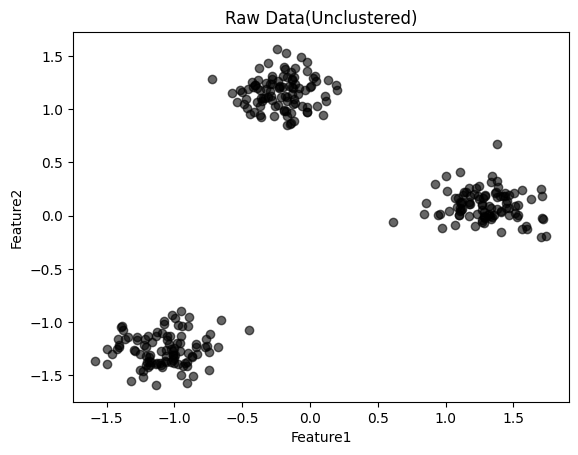

In [7]:
plt.Figure(figsize=(8,6))
plt.scatter(X_scaled[:,0],X_scaled[:,1],color="black",alpha=0.6)
plt.title("Raw Data(Unclustered)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

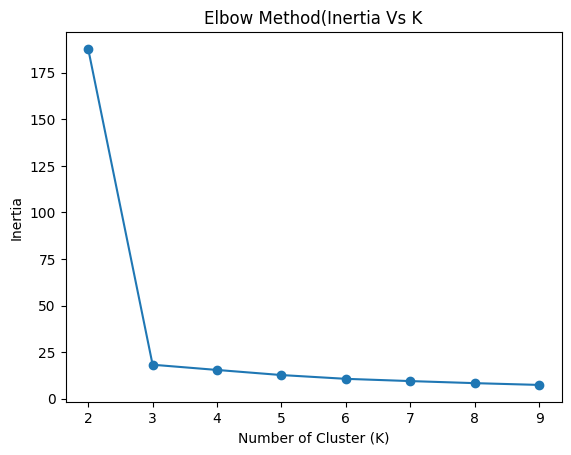

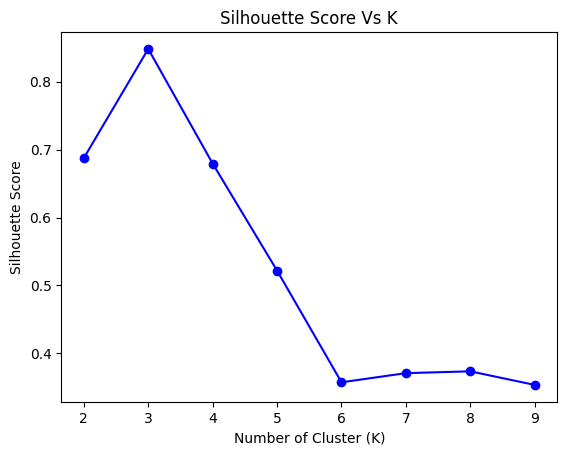

In [8]:
inertia=[]
silhouette_scores=[]

K_range=range(2,10)

for k in K_range:
    kMeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kMeans.fit(X_scaled)
    inertia.append(kMeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled,kMeans.labels_))

plt.Figure(figsize=(8,6))
plt.plot(K_range,inertia,marker='o')
plt.title("Elbow Method(Inertia Vs K")
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Inertia")
plt.show()

plt.Figure(figsize=(8,6))
plt.plot(K_range,silhouette_scores,marker='o',color='blue')
plt.title("Silhouette Score Vs K")
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [10]:
kMeans=KMeans(n_clusters=3,random_state=42,n_init=10)
y_pred=kMeans.fit_predict(X_scaled)
print(y_pred)

[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]


In [12]:
print("Evaluation Metrics for K-Means (k=3):")
print("Silhouette Score:", silhouette_score(X_scaled, y_pred))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, y_pred))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, y_pred))
print("Adjusted Rand Index (vs True Labels):", adjusted_rand_score(Y_true, y_pred))

Evaluation Metrics for K-Means (k=3):
Silhouette Score: 0.8482330810203894
Davies-Bouldin Score: 0.21074868035209512
Calinski-Harabasz Score: 4730.173967940952
Adjusted Rand Index (vs True Labels): 1.0


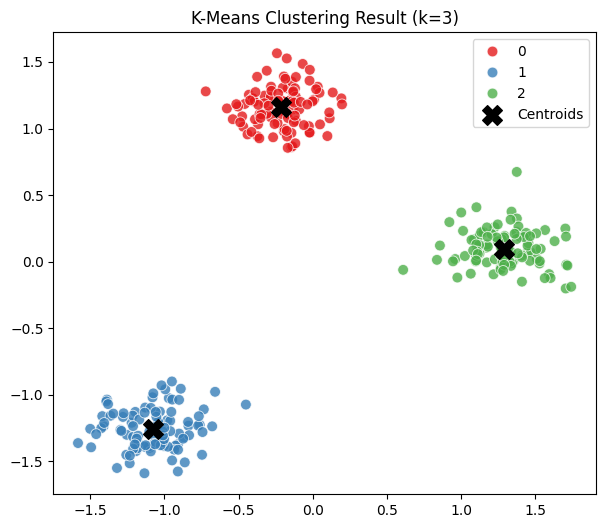

In [17]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_pred, palette="Set1", s=60, alpha=0.8)
plt.scatter(kMeans.cluster_centers_[:,0], kMeans.cluster_centers_[:,1],c="black", marker="X", s=200, label="Centroids")
plt.title("K-Means Clustering Result (k=3)")
plt.legend()
plt.show()

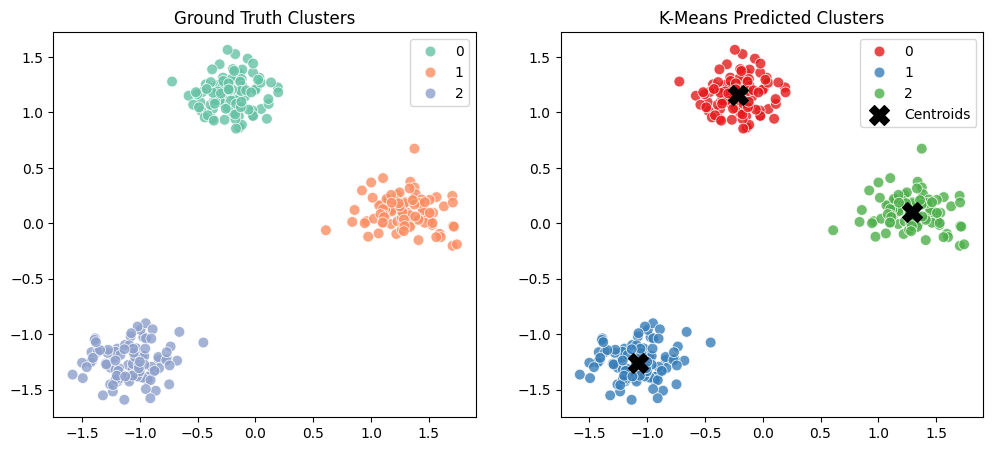

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=Y_true, palette="Set2", s=60, alpha=0.8)
plt.title("Ground Truth Clusters")

plt.subplot(1,2,2)
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_pred, palette="Set1", s=60, alpha=0.8)
plt.scatter(kMeans.cluster_centers_[:,0], kMeans.cluster_centers_[:,1], 
            c="black", marker="X", s=200, label="Centroids")
plt.title("K-Means Predicted Clusters")
plt.legend()

plt.show()